In [1]:
import numpy as np
import os
import sys
import pandas as pd
sys.path.insert(1, '../../')
import matplotlib.pyplot as plt
import matplotlib.cm as cm
%matplotlib inline
from matplotlib.lines import Line2D
from matplotlib.patches import Ellipse
import seaborn as sns
sns.set_theme(style='ticks')

from g2aero.Grassmann_interpolation import GrassmannInterpolator
from g2aero.Grassmann import *
from g2aero.perturbation import PGAspace

plot_folder = os.path.join(os.getcwd(), 'plots_Gn2_blade', )
if not os.path.exists(plot_folder):
    os.makedirs(plot_folder)

In [2]:
def intersection_exist(blade):
    flag = []
    for i, shape in enumerate(blade):
        flag.append(PGAspace.intersection_exist(shape, i))
    return True in flag

In [3]:
shapes_folder  = os.path.join(os.getcwd(), '../../ARPA-E_INTEGRATE/shape_data/dataset/', )
# DU97-W-300 and DU91-W2-250 removed from dataset
airfoils = [
            'NACA64_A17', 
            'DU21_A17', 'DU25_A17', 'DU30_A17', 'DU35_A17', 'DU40_A17', 'DU00-W2-350', 'DU08-W-210',
            'FFA-W3-211',  'FFA-W3-241', 'FFA-W3-270blend', 'FFA-W3-301', 'FFA-W3-330blend', 'FFA-W3-360', 'SNL-FFA-W3-500', 
            ]
n_airfoils = len(airfoils)
label_dict = dict(zip(airfoils, np.arange(n_airfoils)))
files = [shapes_folder + f'{af}.npy'for af in airfoils]
n_landmarks = 401
shapes = np.empty((0, n_landmarks, 2))
for i, file in enumerate(files):
    shapes = np.vstack((shapes, np.load(file)))

# print some summary info
print("Total number of airfoil classes: %i" % n_airfoils)
print("Total number of discrete airfoils: %i" % shapes.shape[0])
print("Landmarks per airfoil: %i" % shapes.shape[1])
print("Intersections detected (boolean): %i" % intersection_exist(shapes))

colors_pallete = [
                   'm', 
                  '#00429d', '#2571b0', '#4a9fc3', '#6fced6', '#96ffea', 
                  '#ff9e7c', '#fa7779', '#e9546f', '#d13660', '#b51c4d', '#940638', '#720022',
                  '#008000', '#43a754', '#65d097', '#58ffd8'
                  ]

dict_color = {airfoils[i] : colors_pallete[i] for i in range(n_airfoils)}
colors = np.array([dict_color[airfoil] for airfoil in airfoils for i in range(1001)])
classes = [airfoil for airfoil in airfoils for i in range(1001)]
handles = [Line2D([0], [0], color='w', markerfacecolor=colors_pallete[i], marker='o', markersize=10, 
                  label=airfoils[i]) for i in range(n_airfoils)]

Total number of airfoil classes: 15
Total number of discrete airfoils: 15015
Landmarks per airfoil: 401
Intersections detected (boolean): 0


In [4]:
pga, t = PGAspace.create_from_dataset(shapes, n_modes=4)
shapes_gr, M, b = landmark_affine_transform(shapes)

Karcher mean convergence:
||V||_F = 0.18603109423116101
||V||_F = 0.0002768567358854574
||V||_F = 4.560172281762308e-07
||V||_F = 9.110541378100801e-10


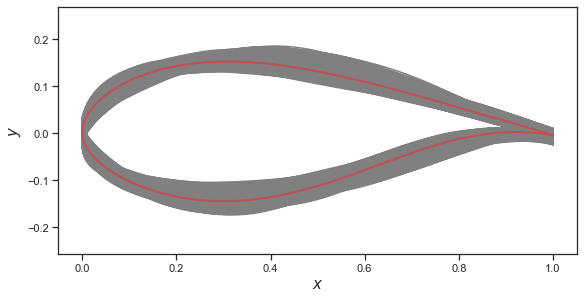

In [5]:
ph_shapes = shapes_gr@ pga.M_mean.T + pga.b_mean
karcher_mean_phys = pga.karcher_mean @ pga.M_mean.T + pga.b_mean

fig, ax = plt.subplots(1, 1, figsize=(9, 4))
for i, xy in enumerate(ph_shapes):
    ax.plot(xy[:, 0], xy[:, 1], color='grey')
ax.axis('equal')
ax.plot(karcher_mean_phys[:, 0], karcher_mean_phys[:, 1], color='r', linewidth='2')
ax.set_xlabel(r'$x$', fontsize=15)
ax.set_ylabel(r'$y$', fontsize=15)
fig.subplots_adjust(left=0.15, right=0.95,  bottom=0.12, top=0.98)
fig.savefig(os.path.join(plot_folder, 'dataset.pdf'))

In [40]:
blades = [] 
blades_gr = []
blades_eta = []
M_blades = []
IEA15_labels = ['SNL-FFA-W3-500', 'FFA-W3-360', 'FFA-W3-330blend', 'FFA-W3-301', 'FFA-W3-270blend', 
              'FFA-W3-241', 'FFA-W3-211']
label_ind = []
for i in IEA15_labels:
    label_ind.append(label_dict[i]*1001)
IEA15_airfoils = t[np.array(label_ind)]
blades.append(IEA15_airfoils)
M_blades.append(M[np.array(label_ind)])
blades_gr.append(shapes_gr[np.array(label_ind)])

IEA10_labels = ['FFA-W3-360', 'FFA-W3-330blend', 'FFA-W3-301', 'FFA-W3-270blend', 'FFA-W3-241', 'FFA-W3-211']
label_ind = []
for i in IEA10_labels:
    label_ind.append(label_dict[i]*1001)
IEA10_airfoils = t[np.array(label_ind)]
blades.append(IEA10_airfoils)
M_blades.append(M[np.array(label_ind)])
blades_gr.append(shapes_gr[np.array(label_ind)])

NREL_labels = ['DU40_A17', 'DU35_A17', 'DU30_A17', 'DU25_A17', 'DU21_A17', 'NACA64_A17']
label_ind = []
for i in NREL_labels:
    label_ind.append(label_dict[i]*1001)
NREL_airfoils = t[np.array(label_ind)]
blades.append(NREL_airfoils)
M_blades.append(M[np.array(label_ind)])
blades_gr.append(shapes_gr[np.array(label_ind)])

# DU97-W-300 and DU91-W2-250 removed from dataset (replacing with DU30_A17 and DU25_A17, resp.)
IEA3_labels = ['DU00-W2-350', 'DU30_A17', 'DU25_A17', 'DU08-W-210']
label_ind = []
for i in IEA3_labels:
    label_ind.append(label_dict[i]*1001)
IEA3_airfoils = t[np.array(label_ind)]
blades.append(IEA3_airfoils)
M_blades.append(M[np.array(label_ind)])
blades_gr.append(shapes_gr[np.array(label_ind)])

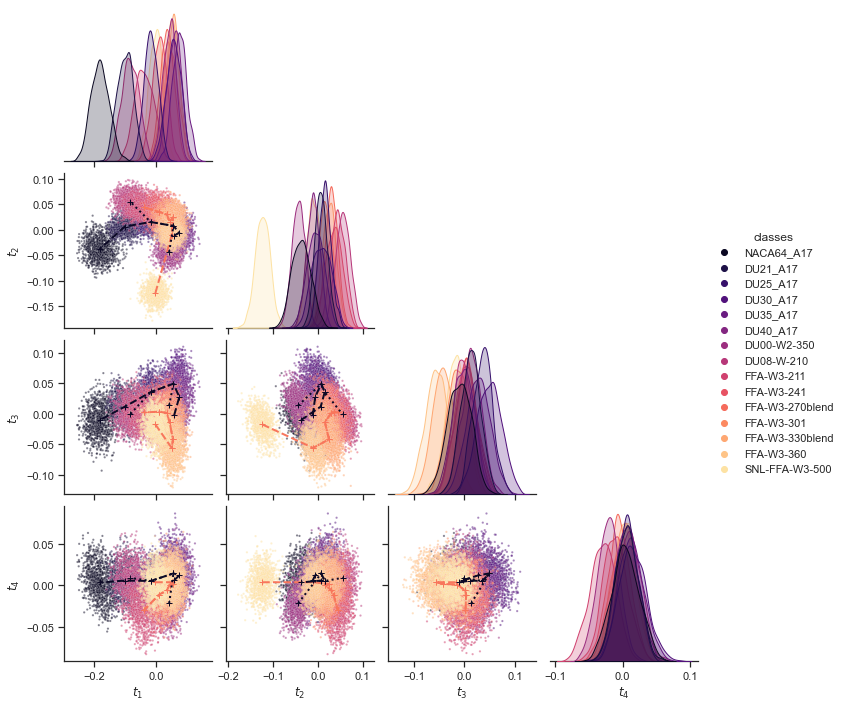

In [7]:
# build dataframe
Grn2_frame = pd.DataFrame(data=np.hstack((t, M[:, :, 1])), 
                          columns=['$t_1$', '$t_2$', '$t_3$', '$t_4$', '$M_{12}$', '$M_{22}$'])
Grn2_frame.insert(5, "classes", classes)
sns_plot = sns.pairplot(Grn2_frame, hue="classes",
                        x_vars=['$t_1$', '$t_2$', '$t_3$', '$t_4$'],
                        y_vars=['$t_1$', '$t_2$', '$t_3$', '$t_4$'],
                        diag_kind='kde', palette="magma", corner=True, plot_kws=dict(alpha=.5, s=5))
# sns_plot.map_lower(sns.kdeplot, levels=1)

# overlay blade curves and compute representative Gr(n,2) elements
cmap = cm.get_cmap('magma', n_airfoils)
for k, plt_blade in enumerate(blades):
    
    if k<2:
        blade_color = cmap(10)
    else:
        blade_color = cmap(1)
    if k % 2 == 0:
        blade_line = 'dashed'
    else:
        blade_line = 'dotted'
    
    # t_1 vs t_2
    sns_plot.axes[1,0].plot(plt_blade[:,0], plt_blade[:,1], 
                            linewidth=2, color=blade_color, linestyle=blade_line, marker="+")
    # t_1 vs t_3
    sns_plot.axes[2,0].plot(plt_blade[:,0], plt_blade[:,2], 
                            linewidth=2, color=blade_color, linestyle=blade_line, marker="+")
    # t_1 vs t_4
    sns_plot.axes[3,0].plot(plt_blade[:,0], plt_blade[:,3], 
                            linewidth=2, color=blade_color, linestyle=blade_line, marker="+")
    # t_2 vs t_3
    sns_plot.axes[2,1].plot(plt_blade[:,1], plt_blade[:,2], 
                            linewidth=2, color=blade_color, linestyle=blade_line, marker="+")
    # t_2 vs t_4
    sns_plot.axes[3,1].plot(plt_blade[:,1], plt_blade[:,3], 
                            linewidth=2, color=blade_color, linestyle=blade_line, marker="+")
    # t_3 vs t_4
    sns_plot.axes[3,2].plot(plt_blade[:,2], plt_blade[:,3], 
                            linewidth=2, color=blade_color, linestyle=blade_line, marker="+")

sns_plot.savefig(os.path.join(plot_folder, 'scatter_balde_curves.png'))

In [8]:
# cum_dist = []
# for my_blade in blades:
#     phys_blade, gr_blade, _ = pga.generate_perturbed_shapes(coef=my_blade)
#     dist = np.zeros((gr_blade.shape[0],1))
#     for i in range(gr_blade.shape[0]-1):
#         dist[i+1] = distance(gr_blade[i,:,:].reshape((n_landmarks,2)), gr_blade[i+1,:,:].reshape((n_landmarks,2)))
#     cum_dist.append(np.cumsum(dist))

# fig, ax = plt.subplots(1, 4, figsize=(30,8))
# for k, dist in enumerate(cum_dist):
#     if k<2:
#         blade_color = cmap(10)
#     else:
#         blade_color = cmap(1)
#     if k % 2 == 0:
#         blade_line = 'dashed'
#     else:
#         blade_line = 'dotted'
#     for i in range(4):
#         ax[i].plot(dist, blades[k][:,i], color=blade_color, linestyle=blade_line, linewidth=2)
#         ax[i].axis('equal')
#         ax[i].set_xlabel(r'$\ell$', fontsize=15)
#         ax[i].set_ylabel(r'$t_{%i}(\ell)$' % i, fontsize=15)
# fig.savefig(os.path.join(plot_folder, 'balde_curves.png'))

AttributeError: 'PGAspace' object has no attribute 'shape_in_PGA_coordinates'

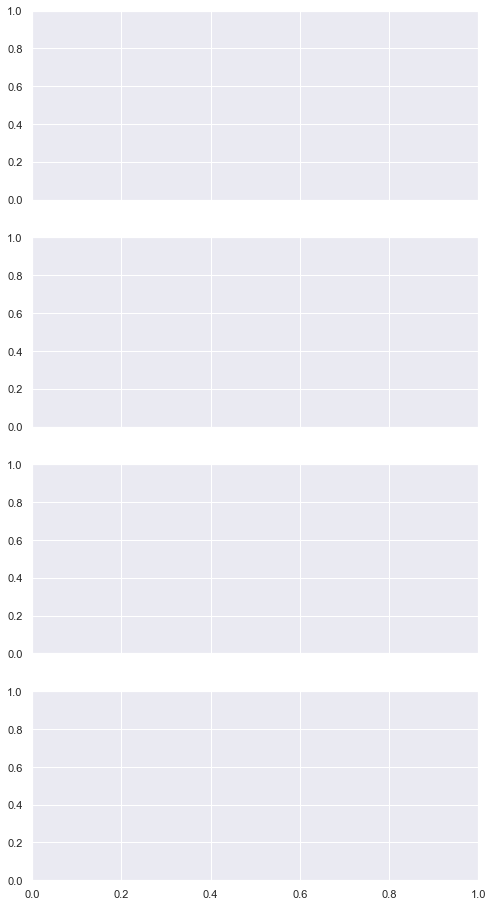

In [9]:
# sns.set()
# circle = np.load(os.path.join(shapes_folder, 'circle.npy'))
# fig, ax = plt.subplots(4, 1, figsize=(8, 16), sharex=True)
# for k, (blade, pga_coord) in enumerate(zip(blades_gr, blades)):
#     blade = np.vstack((circle.reshape(1, 401, 2), blade))
#     nominal_pga = pga.shape_in_PGA_coordinates(blade)
#     Grassmann = GrassmannInterpolator(np.linspace(0, 1, len(blade)), blade)
#     new_eta = Grassmann.sample_eta(n_samples=30, n_end=0)
#     _, shapes_gr_new = Grassmann(new_eta, grassmann=True)
#     new_pga = pga.shape_in_PGA_coordinates(shapes_gr_new)
#     dist = np.cumsum(Grassmann.calc_grassmann_distance(shapes_gr_new))
#     if k<2:
#         blade_color = cmap(10)
#     else:
#         blade_color = cmap(1)
#     if k % 2 == 0:
#         blade_line = 'dashed'
#     else:
#         blade_line = 'dotted'
#     for i in range(4):
#         ax[i].plot(dist, new_pga[:, i], color=blade_color, linestyle=blade_line, linewidth=2)
#         ax[i].scatter(np.cumsum(Grassmann.dist_grassmann), nominal_pga[:, i], color=blade_color)
#         ax[i].set_ylabel(r'$t_{%i}(\ell)$' % i, fontsize=15)
#         fig.subplots_adjust( hspace=0.1)
#     ax[-1].set_xlabel(r'$\ell$', fontsize=15)
# fig.savefig(os.path.join(plot_folder, 'blade_curves.pdf'))

In [24]:
perturbation, coef = pga.generate_perturbed_blade(blades_gr[0], coef=None, n=1)
t_perturbation = pga.gr_shapes2PGA(perturbation)
print(t_perturbation.shape, coef)

(7, 4) [[-0.14068386  0.03307706  0.0534277  -0.05119381]]


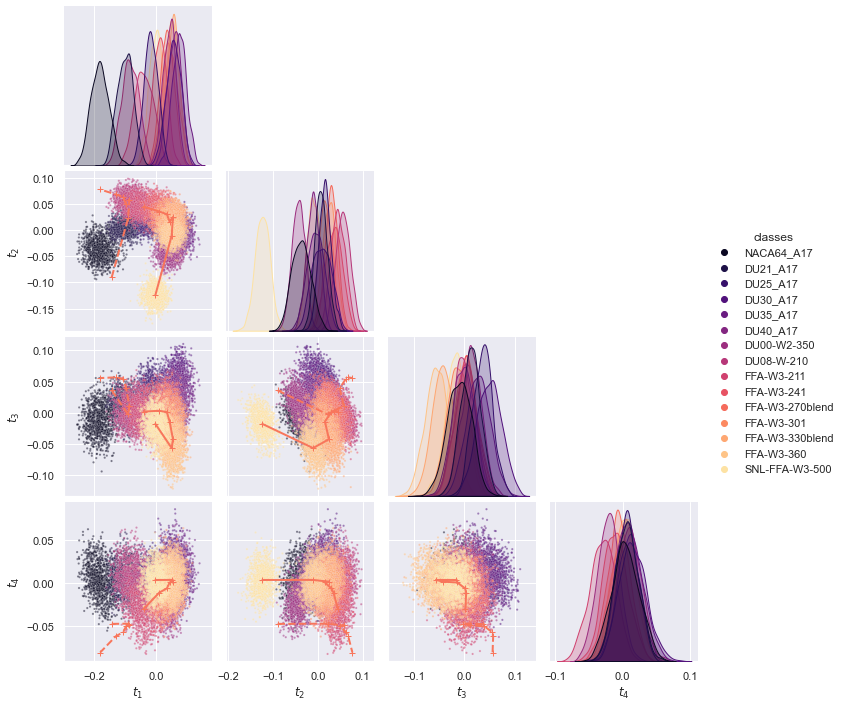

In [53]:
# build dataframe
Grn2_frame = pd.DataFrame(data=np.hstack((t, M[:, :, 1])), 
                          columns=['$t_1$', '$t_2$', '$t_3$', '$t_4$', '$M_{12}$', '$M_{22}$'])
Grn2_frame.insert(5, "classes", classes)
sns_plot = sns.pairplot(Grn2_frame, hue="classes",
                        x_vars=['$t_1$', '$t_2$', '$t_3$', '$t_4$'],
                        y_vars=['$t_1$', '$t_2$', '$t_3$', '$t_4$'],
                        diag_kind='kde', palette="magma", corner=True, plot_kws=dict(alpha=.5, s=5))
# sns_plot.map_lower(sns.kdeplot, levels=1)

# overlay blade curves and compute representative Gr(n,2) elements
cmap = cm.get_cmap('magma', n_airfoils)
for k, plt_blade in enumerate([blades[0], t_perturbation]):
    
    blade_color = cmap(10)
    if k != 0:
        blade_line = 'dashed'
    else:
        blade_line = '-'
    
    # t_1 vs t_2
    sns_plot.axes[1,0].plot(plt_blade[:,0], plt_blade[:,1], 
                            linewidth=2, color=blade_color, linestyle=blade_line, marker="+")
    # t_1 vs t_3
    sns_plot.axes[2,0].plot(plt_blade[:,0], plt_blade[:,2], 
                            linewidth=2, color=blade_color, linestyle=blade_line, marker="+")
    # t_1 vs t_4
    sns_plot.axes[3,0].plot(plt_blade[:,0], plt_blade[:,3], 
                            linewidth=2, color=blade_color, linestyle=blade_line, marker="+")
    # t_2 vs t_3
    sns_plot.axes[2,1].plot(plt_blade[:,1], plt_blade[:,2], 
                            linewidth=2, color=blade_color, linestyle=blade_line, marker="+")
    # t_2 vs t_4
    sns_plot.axes[3,1].plot(plt_blade[:,1], plt_blade[:,3], 
                            linewidth=2, color=blade_color, linestyle=blade_line, marker="+")
    # t_3 vs t_4
    sns_plot.axes[3,2].plot(plt_blade[:,2], plt_blade[:,3], 
                            linewidth=2, color=blade_color, linestyle=blade_line, marker="+")

sns_plot.savefig(os.path.join(plot_folder, 'scatter_balde_perturbed.png'))

(7, 401, 2) (7, 401, 2) (7, 2, 2)


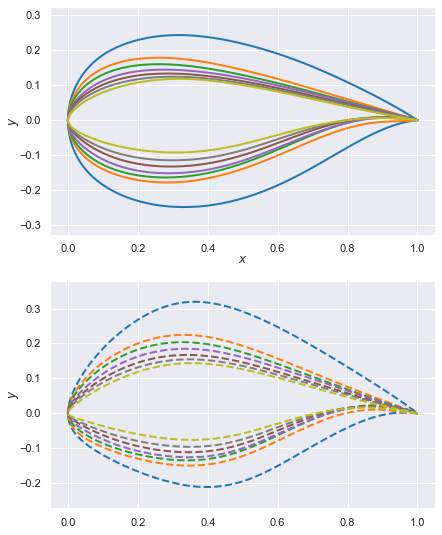

In [54]:
from g2aero.utils import position_airfoil
fig, ax = plt.subplots(2,1, figsize=(6, 8))
cmap = cm.get_cmap("tab10", 8)
print(cmap)
print(blades_gr[0].shape, perturbation.shape,  M_blades[0].shape)
for i, (shape, new, m) in enumerate(zip(blades_gr[0], perturbation, M_blades[0])):

    old_phys = position_airfoil(shape@m.T)
    new_phys = position_airfoil(new@m.T)
    ax[0].plot(old_phys[:, 0], old_phys[:, 1], color = cmap(i), lw=2); 
    ax[1].plot(new_phys[:, 0], new_phys[ :, 1], color = cmap(i), ls='--', lw=2);
#     ax.axis('off')
    ax[0].set_ylabel(r"$y$", labelpad=-2)
    ax[1].set_ylabel(r"$y$", labelpad=-2)
    ax[0].axis('equal')
    ax[1].axis('equal')
ax[0].set_xlabel(r"$x$", labelpad=0)
fig.subplots_adjust(left=0.1, right=0.99, bottom=0.12, top=0.99)
fig.savefig(os.path.join(plot_folder, 'perturbed_blade_phys.pdf'))